<a href="https://colab.research.google.com/github/wheemin-2/24-2-ESAA/blob/main/0913_HW_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seaborn**

## **히스토그램(Histogram)**

* 연속형 값을 그룹화하여 개별 구간에 해당하는 데이터의 건수를 시각화함
* histplot(), displot() 함수 사용
* histplot() : Axes 레벨 함수
* displot() : Figure 레벨 함수

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **histplot()**

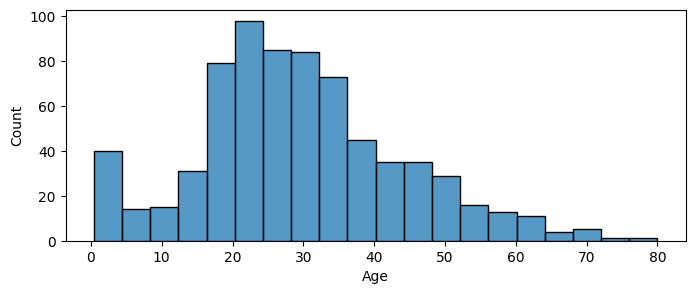

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#seaborn에서도 plt.figure의 figsize 인자를 입력하여 전체 Figure의 크기를 조절
plt.figure(figsize=(8,3))

#DataFrame의 칼럼명을 자동으로 인식해서 xlabel 값을 할당, ylabel 값은 count로 설정
sns.histplot(titanic_df['Age'], bins=20)
plt.show()

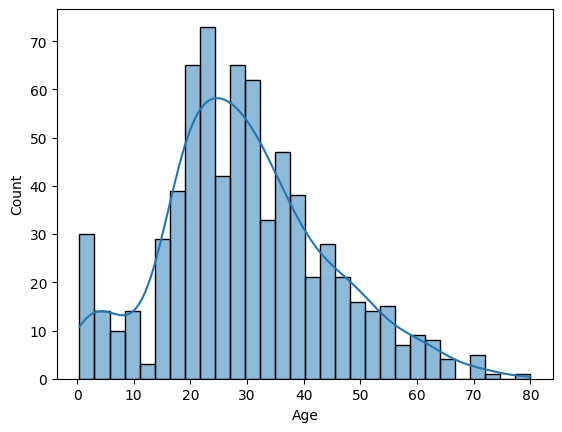

In [4]:
#data, x, kde 인자를 설정해 시각화
#data : 시각화 대상 DataFrame, kde : 연속 확률분포 곡선
sns.histplot(data=titanic_df, x='Age', bins=30, kde=True)
plt.show()

### **displot()**

* 시본의 Figure 레벨 함수를 사용하면 plt.figure()를 이용하여 Figure의 크기를 조절할 수 없음
* height, aspect : displot() 함수의 Figure 크기를 조절하기 위한 인자
    * height : 세로(높이)
    * aspect : 가로와 세로의 배율
    * height=4, aspect=2 이면 가로는 4*2인 8이 됨

<Figure size 800x400 with 0 Axes>

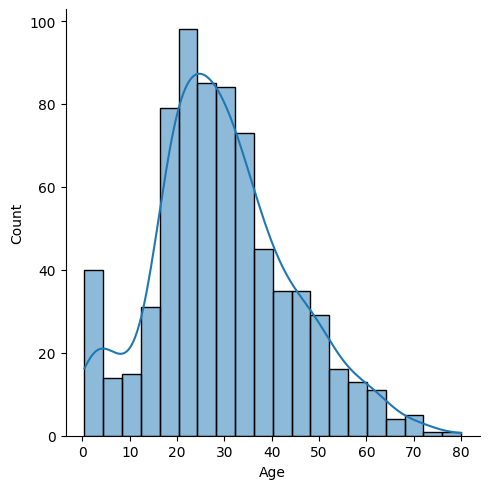

In [5]:
#displot() : seaborn의 figure 레벨 그래프
#plt.figure()로 크기 조절 불가능!!

plt.figure(figsize=(8,4))                          #적용 안됨
sns.displot(x='Age',data=titanic_df, kde=True)
plt.show()

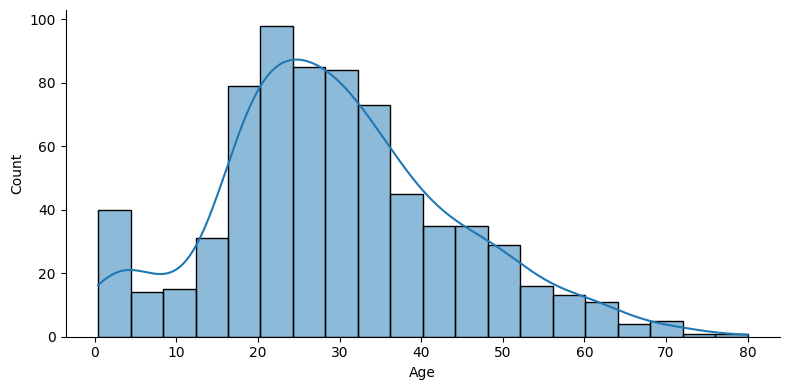

In [6]:
sns.displot(data=titanic_df, x='Age', kde=True, height=4, aspect=2)
plt.show()

## **카운트 플롯(Countplot)**

* 이산형 값의 건수를 막대 그래프 형태로 시각화 (히스토그램 : 연속형 값에 대한 구간별 건수를 시각화)


<ipython-input-7-ee09e5025d09>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic_df, x='Pclass', palette='viridis')


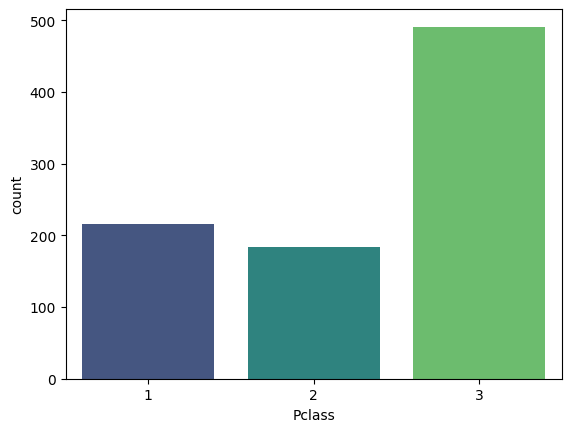

In [7]:
sns.countplot(data=titanic_df, x='Pclass', palette='viridis')
plt.show()

## **바 플롯(Barplot)**

* X축 값이 이산형 값으로, 종류가 많지 않을 때 유용하게 사용됨
* Y축 값은 평균/총합으로 표현되는 연속형 값을 가짐
    * default : 평균
    * estimator 인자를 통해 sum이나 median 등으로 설정 가능
* 바 플롯을 수평 막대 그래프로 그리면 X축과 Y축이 바뀜 -> X : 연속형, Y : 이산형 값을 가지도록 설정해야함
    * orient 인자를 통해 수직(v), 수평(h) 막대 그래프를 선택할 수 있음
    * orient : 입력받은 x,y의 데이터 형태를 보고 자동으로 그려주지만, 모두 숫자형이라면 수직 막대그래프를 우선으로 그려줌
    

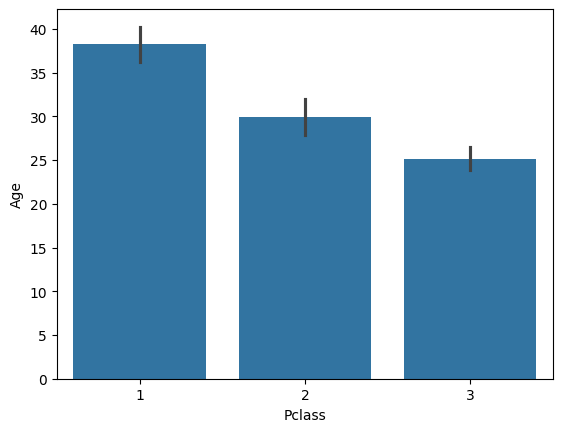

In [8]:
#Pclass 별로 Age의 평균 값 표현
#barplot 함수는 기본적으로 Y축 값의 평균을 나타내므로 따로 y='Age'.mean 이런 식으로 나타낼 필요 없음
sns.barplot(data=titanic_df, x='Pclass', y='Age')
plt.show()

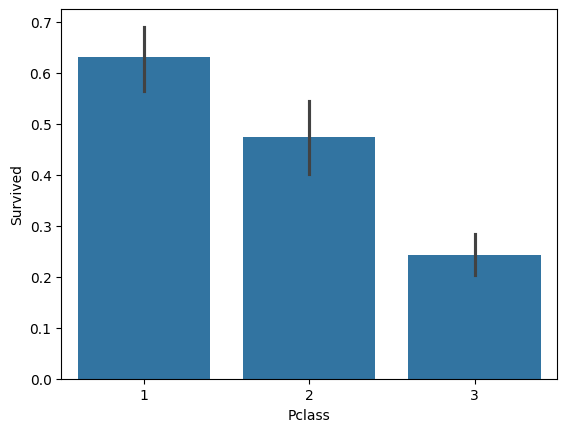

In [9]:
#Pclass 별 생존자 수 평균

sns.barplot(data=titanic_df, x='Pclass', y='Survived')
plt.show()

Survived값이 0과 1로 되어있으므로 Y축은 선실 등급별 승객의 평균 생존율을 나타내게 됨

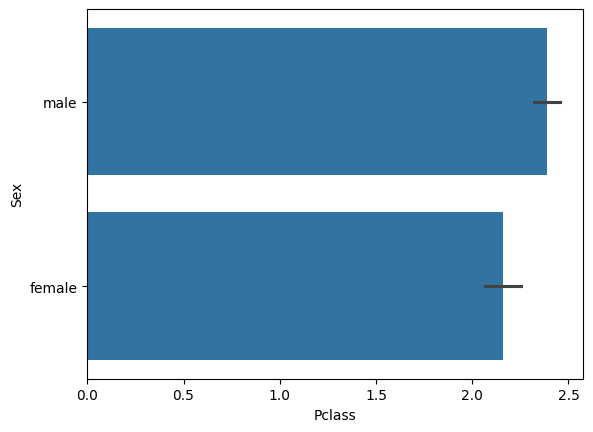

In [10]:
#y축 값을 문자값으로 설정하면 자동으로 수평 막대 그래프로 변환해줌

sns.barplot(data=titanic_df, x='Pclass', y='Sex')   # x:숫자형, y:문자형 -> 수평 그래프
plt.show()

**수직 막대그래프**
* X축 : 이산형 값, 숫자값이나 문자열값이 가능
* Y축 : 무조건 연속형! (문자열값으로 설정하면 안됨)

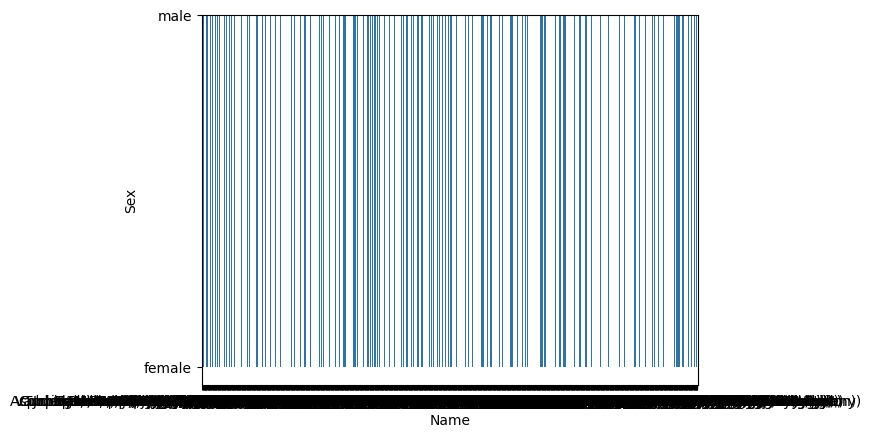

In [11]:
#X축과 Y축을 모두 문자열값으로 받은 경우
#결과는 나오지만 무의미함

sns.barplot(x='Name',y='Sex',data=titanic_df)
plt.show()

<ipython-input-12-10b7c1c449a4>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic_df, x='Pclass', y='Survived', estimator=sum, ci=None)   #ci=None : 막대 가운데의 선 없애줌


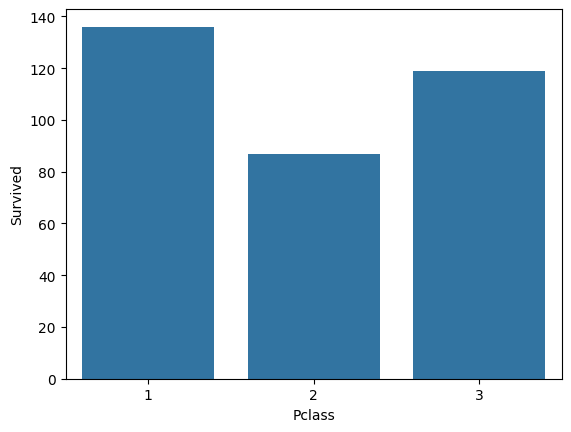

In [12]:
#Y축 표현값을 총합으로 나타내는 경우
#Pclass별 Survived의 총합

sns.barplot(data=titanic_df, x='Pclass', y='Survived', estimator=sum, ci=None)   #ci=None : 막대 가운데의 선 없애줌
plt.show()

## **hue 인자**

* barplot() 함수는 hue 인자를 통해서 세부 정보를 추가적으로 전달할 수 있음
* Seaborn의 여러 시각화 플롯 함수들은 hue 인자값으로 세부 정보를 시각화할 수 있음

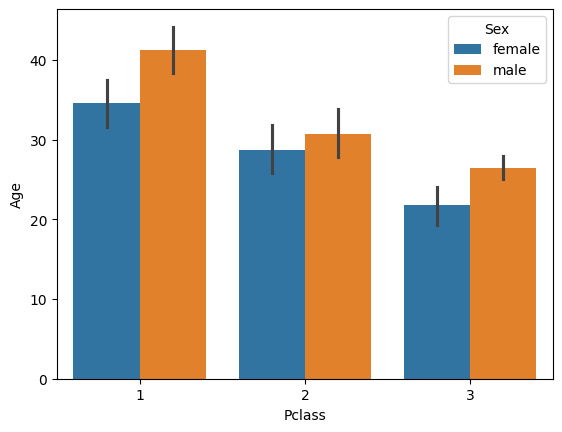

In [13]:
#Pclass를 X값, Age를 Y값으로 설정 + Sex에 따른 평균 나이를 시각화하기
#Pclass와 Sex 별 평균 나이

sns.barplot(data=titanic_df, x='Pclass', y='Age', hue='Sex')
plt.show()

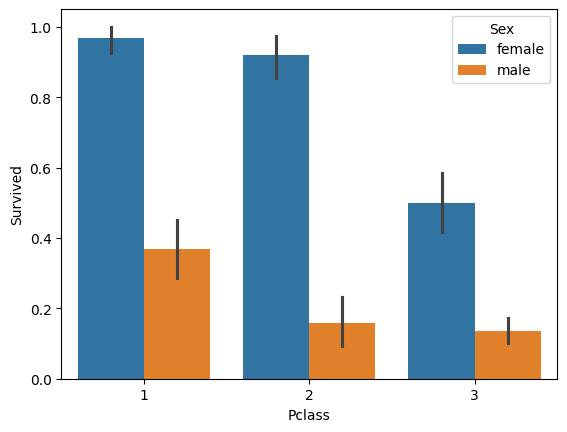

In [14]:
#Pclass에 따른 Sex별 생존율 시각화

sns.barplot(data=titanic_df, x='Pclass', y='Survived', hue='Sex')
plt.show()

## **박스 플롯(Boxplot)**

* 연속형 값에 대한 IQR 분위, min/max, 이상치 정보를 시각화
* y에 연속형 값 입력시 수직 박스 플롯
* x에 연속형 값 입력시 수평 박스 플롯을 그림

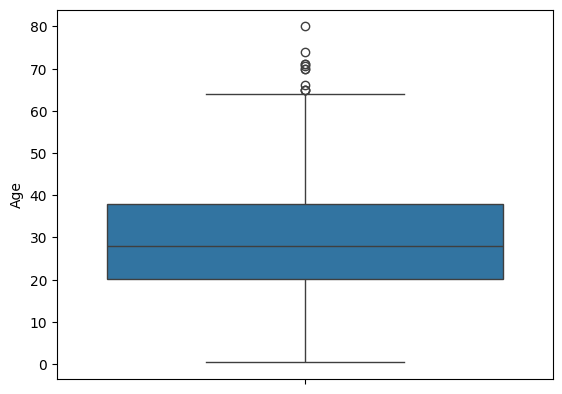

In [15]:
sns.boxplot(data=titanic_df, y='Age')
plt.show()

<ipython-input-16-c51aa73336d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic_df, x='Pclass', y='Age', palette='deep')


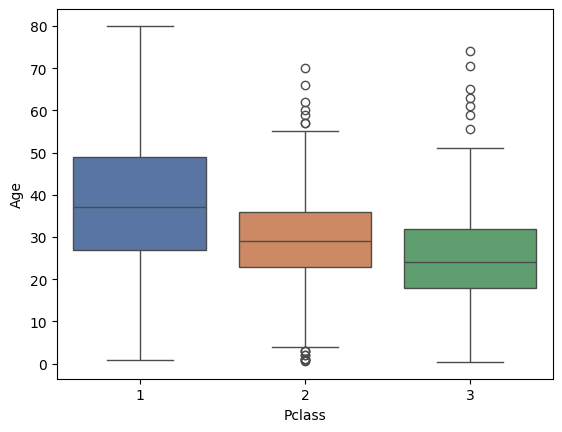

In [16]:
#Pclass 별 Age의 박스 플롯 그리기

sns.boxplot(data=titanic_df, x='Pclass', y='Age', palette='deep')
plt.show()

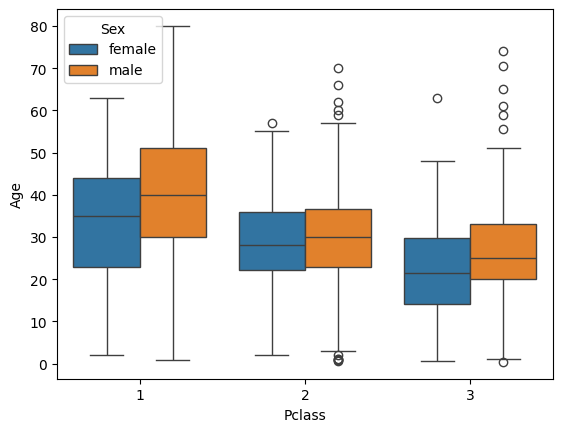

In [17]:
#hue를 적용하여 추가적인 정보 출력하기
#Pclass 값별 Sex에 따른 Age 박스 플롯 출력

sns.boxplot(data=titanic_df, x='Pclass', y='Age', hue='Sex')
plt.show()

## **바이올린 플롯(Violin plot)**

* 연속 확률 분포 곡선과 박스 플롯을 함께 시각화
* 연속형 값에 적용해야 의미 있는 정보로 시각화됨
* boxplot() 함수와 동일하게 x 또는 y 축에 연속형 값을 입력할 수 있음
    * y 축에 입력 시 수직 바이올린 플롯
    * x 축에 입력 시 수평 바이올린 플롯

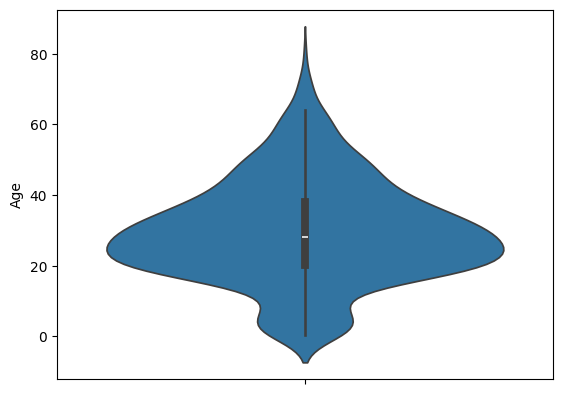

In [18]:
sns.violinplot(data=titanic_df, y='Age')
plt.show()

<ipython-input-19-0451cc716ae6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=titanic_df, x='Pclass', y='Age', palette='muted')


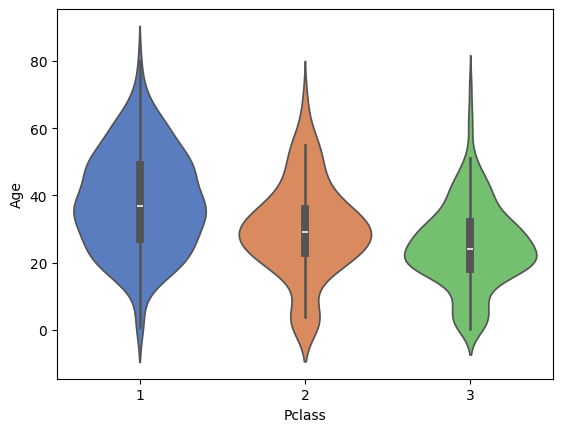

In [19]:
#Pclass별 Age의 바이올린 플롯 그리기

sns.violinplot(data=titanic_df, x='Pclass', y='Age', palette='muted')
plt.show()

1등실 승객의 나이는 30대 초반부터 40대 후반까지 비교적 넓은 범위에 퍼져있으나, 2/3등실 승객의 나이는 20대 후반에서 30대 초반까지 상대적으로 좁은 범위에 집중되어있음을 알 수 있음

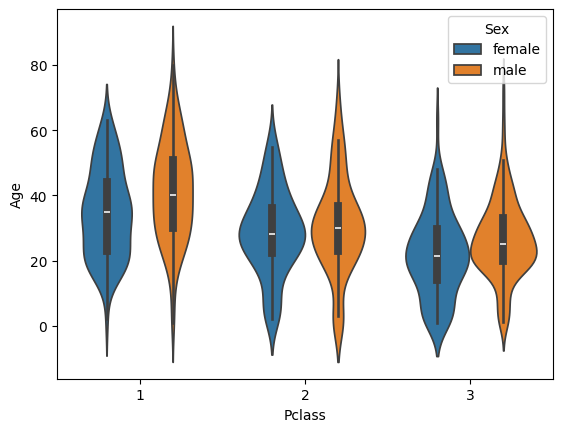

In [20]:
#hue를 이용하여 세부적인 정보를 제공
#Pclass 내에서 Sex별 Age의 바이올린 플롯 출력

sns.violinplot(data=titanic_df, x='Pclass', y='Age', hue='Sex')
plt.show()

## **subplots를 이용하여 시본의 다양한 그래프를 시각화**



```
sns.plot(x= , y= , data= , ax=axs[index])
```



index: 0
index: 1
index: 2


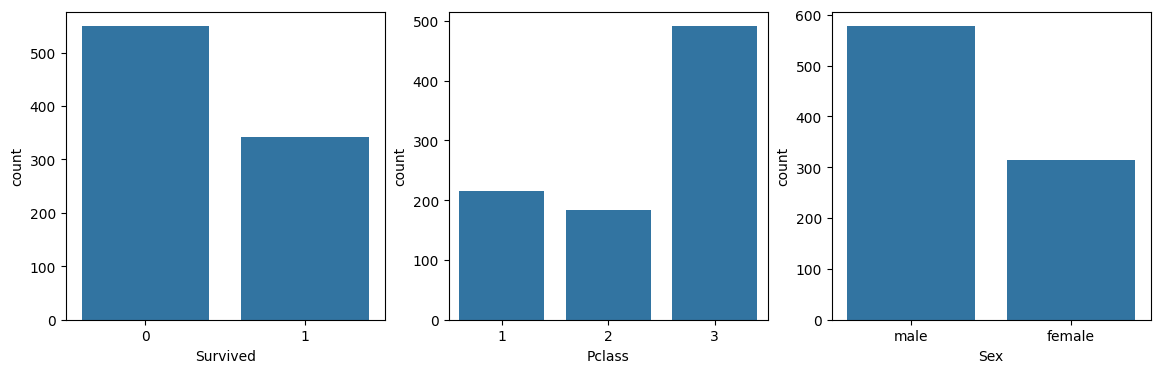

In [21]:
cat_columns = ['Survived', 'Pclass', 'Sex']

fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14,4))

for index, column in enumerate(cat_columns):
    print('index:', index)
    sns.countplot(x=column, data=titanic_df, ax=axs[index])

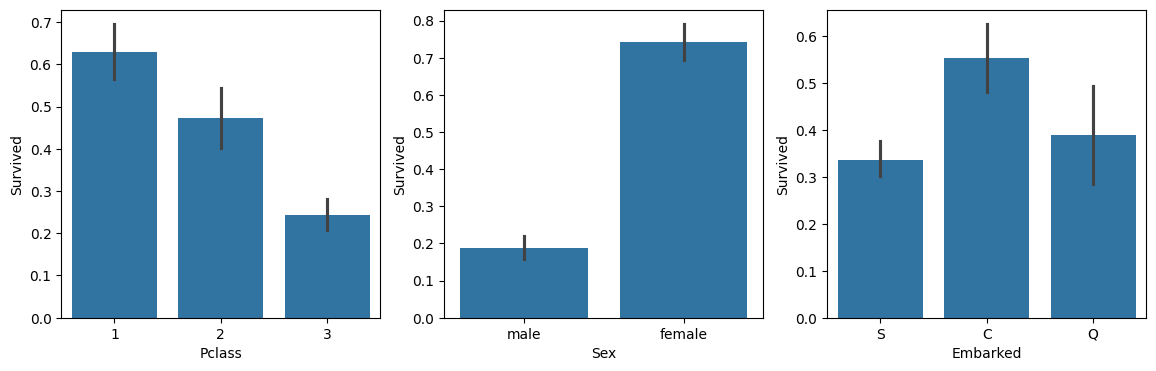

In [30]:
cat_columns = ['Pclass', 'Sex', 'Embarked']

fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14,4))

for index, column in enumerate(cat_columns):
    sns.barplot(x=column, y='Survived', data=titanic_df, ax=axs[index])

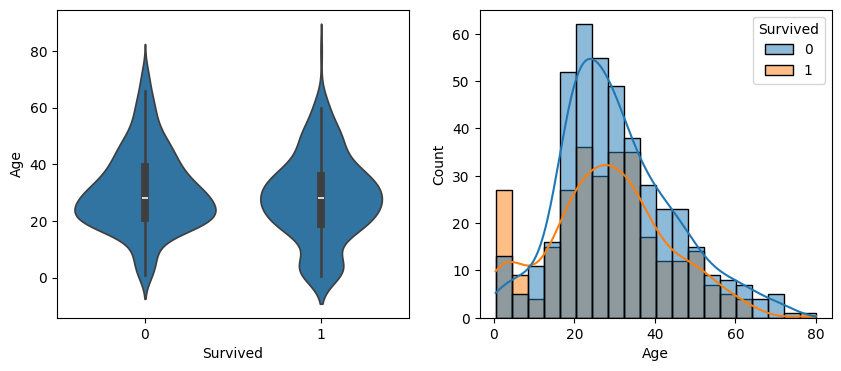

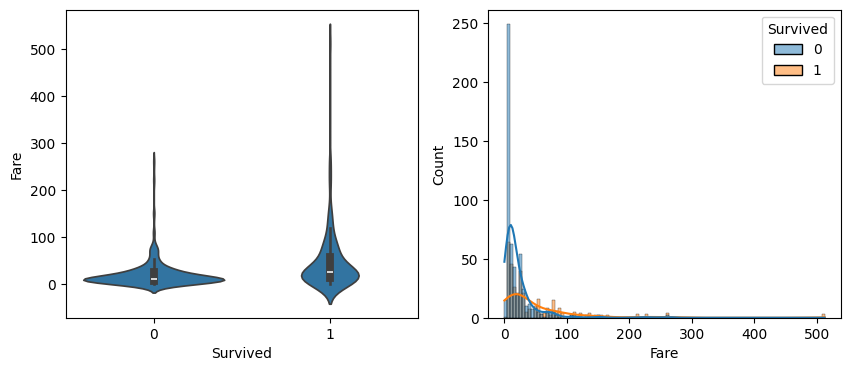

In [31]:
cont_columns = ['Age', 'Fare']

for column in cont_columns:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    sns.violinplot(x='Survived', y=column, data=titanic_df, ax=axs[0])
    sns.histplot(x=column, data=titanic_df, kde=True, hue='Survived', ax=axs[1])

## **산점도, 스캐터 플롯(Scatter plot)**

* 일반적으로 X,Y 축 값이 모두 연속형 숫자값이어야 의미있는 시각화 정보를 얻을 수 있음

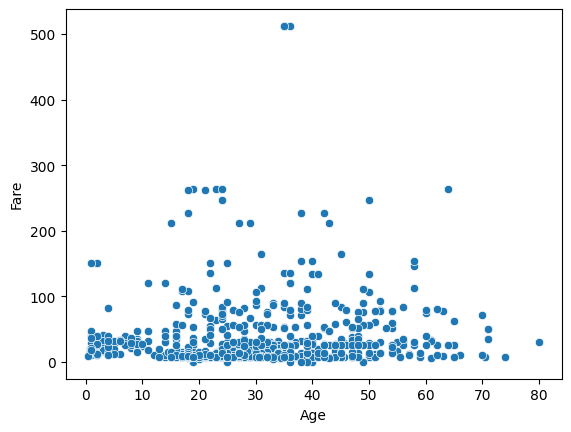

In [22]:
#Age와 Fare 간의 관계를 산점도로 시각화

sns.scatterplot(data=titanic_df, x='Age', y='Fare')
plt.show()

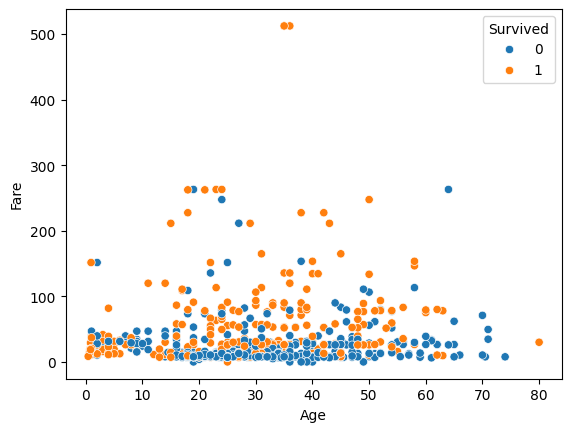

In [23]:
#hue 인자를 이용하여 Survived 여부로 점을 분리

sns.scatterplot(data=titanic_df, x='Age', y='Fare', hue='Survived')
plt.show()

### **style 인자**

* scatterplot은 hue 외에도 style 인자를 이용하여 좀 더 세분화된 구분을 가능하게 할 수 있음

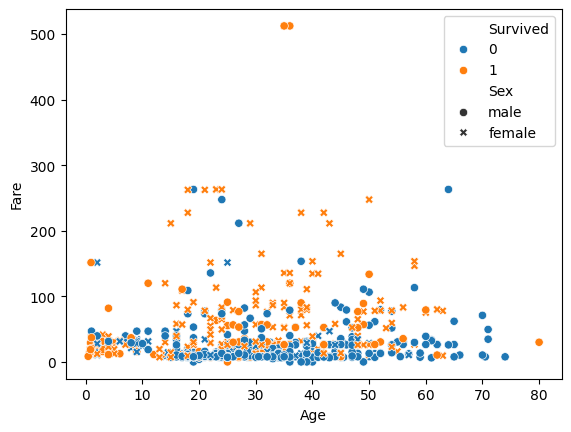

In [24]:
sns.scatterplot(data=titanic_df, x='Age', y='Fare', hue='Survived', style='Sex')
plt.show()

## **상관 히트맵(Correlation Heatmap)**

* 상관계수(correlation coefficient) : 두 변수 간의 선형적인 연관 관계를 수치화한 값
    * 0 : 관계 없음, -1 : 음의 방향으로 동일, 1 : 양의 방향으로 동일

* heatmap() : 인자로 칼럼들 간의 상관계수를 가지는 DataFrame을 입력받아야함!!
    * pandas의 corr() 메서드 : 상관계수를 가지는 df 생성 가능

* cmap 인자값을 설정하여 여러가지 색상으로 표현 가능
    * default : cmap='rocket'

* annot 인자값을 True/False 로 설정하여 상관계숫값 표시 여부를 결정할 수 있음
    * fmt : 상관계숫값을 표시하는 경우에 소수점 자리를 설정하는 인자
    * fmt = ' .1f ' : 소수점 아래 한 자리까지만 표현

* cbar 인자값을 True/False로 설정하여 숫자값에 따른 색깔 기준 막대를 표시
    * default : cbar='True' (막대가 나오는 게 기본)

In [25]:
#titanic_df에서 칼럼들 간의 상관계수를 가지는 df 생성하기
#상관계수는 수치형 칼럼들 사이에서만 계산 가능하므로 numeric_only=True를 입력해야 정상적으로 작동

corr_df = titanic_df.corr(numeric_only=True)
corr_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


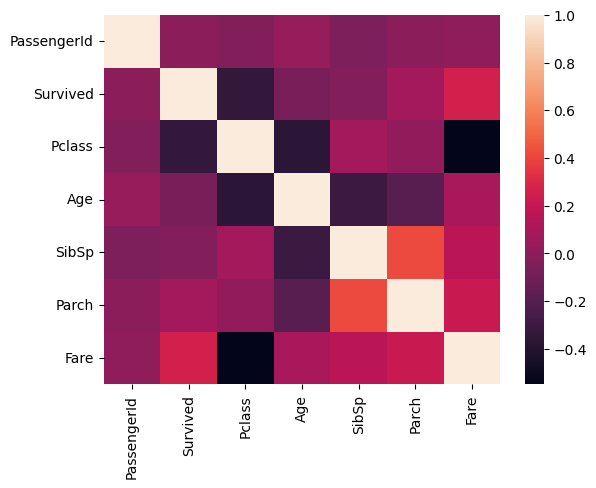

In [26]:
sns.heatmap(corr_df)
plt.show()

*이때 Pclass와 Survived 변수는 이산형 칼럼이지만 데이터가 숫자형이므로 상관계수가 계산됨에 유의해야함*

* Survived와 Pclass는 음의 상관관계를 가짐

    : 객실의 등급이 낮아질 수록 산 사람(Survived=1)이 많음


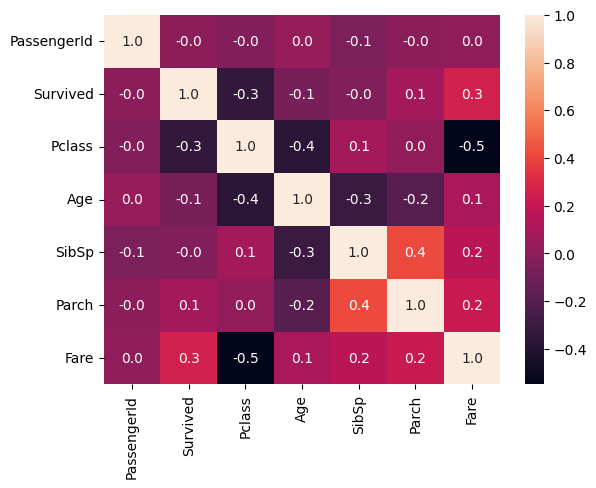

In [27]:
#heatmap() 함수 내의 여러 인자들 살펴보기

sns.heatmap(corr_df, annot=True, fmt='.1f', cbar=True)
plt.show()

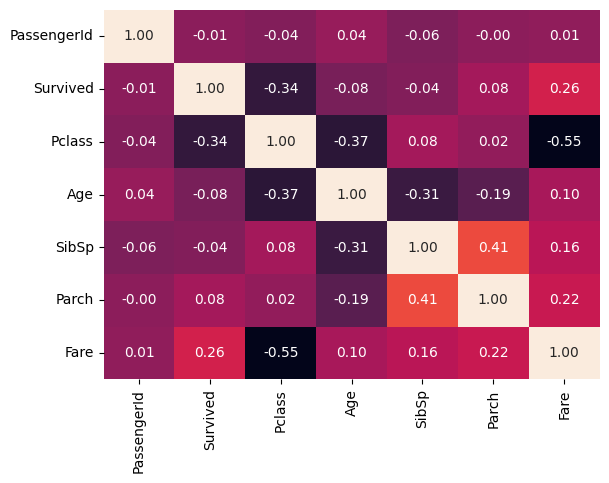

In [28]:
#상관계수 소수점 아래 둘째 자리까지 표현, 색깔 기준 막대 표시하지 않음
sns.heatmap(corr_df, annot=True, fmt='.2f', cbar=False)
plt.show()